## Building a small CNN for image classification

1) Import libraries
###### I am using tensorflow mainly because of the dataset i am importing from there and matplotlib to visulaize the training results. 

2) Dataset
###### I am using CIFAR-10 dataset , a begineer friendly image classification dataset , from tensorflow library.

3) Noramlize the dataset
4) Build a CNN Architecture.
5) Train the model.
6) Evaluate the accuracy of model.



# Import Libraries

In [62]:
import tensorflow as tnf
from tensorflow.keras import layers, models
import matplotlib.pyplot as pplt
import numpy as npy


# Load CIFAR-10 dataset

In [63]:
(train_images, train_labels), (test_images, test_labels) = tnf.keras.datasets.cifar10.load_data()

# Normalize the dataset

In [64]:
train_the_images = train_images.astype("float32") / 255.0
test_the_images = test_images.astype("float32") / 255.0

# One-hot encoding

In [65]:
num_of_classes = 10

train_labels_encoded = tnf.keras.utils.to_categorical(train_labels, num_of_classes)
test_labels_encoded = tnf.keras.utils.to_categorical(test_labels, num_of_classes)

# CNN Architecture

In [66]:
my_cnn_model= models.Sequential()

In [67]:

# INPUT + FIRST CONVOLUTION LAYER
my_cnn_model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))

#  MAXPOOLING LAYER 1
my_cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# SECOND CONVOLUTION LAYER
my_cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# MAXPOOLING LAYER 2
my_cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# FLATTEN
my_cnn_model.add(layers.Flatten())

#  FULLY CONNECTED DENSE LAYER
my_cnn_model.add(layers.Dense(64, activation='relu'))

# OUTPUT LAYER
my_cnn_model.add(layers.Dense(10, activation='softmax'))

c:\Users\PC\anaconda3\envs\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model Summary

In [68]:
my_cnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 30, 30, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 13, 13, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,530 (310.66 KB)

 Trainable params: 79,530 (310.66 KB)

 Non-trainable params: 0 (0.00 B)

# Model Compile

In [69]:
my_cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the Model

In [79]:
# TRAINING IT FOR 15 EPOCHS

history = my_cnn_model.fit(train_the_images, train_labels_encoded,epochs=10,batch_size=64,validation_data=(test_the_images, test_labels_encoded))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8965 - loss: 0.2962 - val_accuracy: 0.6536 - val_loss: 1.5894
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9020 - loss: 0.2802 - val_accuracy: 0.6584 - val_loss: 1.5917
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9047 - loss: 0.2778 - val_accuracy: 0.6629 - val_loss: 1.6242
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9088 - loss: 0.2620 - val_accuracy: 0.6540 - val_loss: 1.6606
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9082 - loss: 0.2648 - val_accuracy: 0.6563 - val_loss: 1.7277
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9107 - loss: 0.2535 - val_accuracy: 0.6525 - val_loss: 1.7408
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9127 - loss: 0.2494 - val_accuracy: 0.6529 - val_loss: 1.8197
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9160 - loss: 0.2379 - val_accuracy: 0.

# Training Loss v/s Epochs

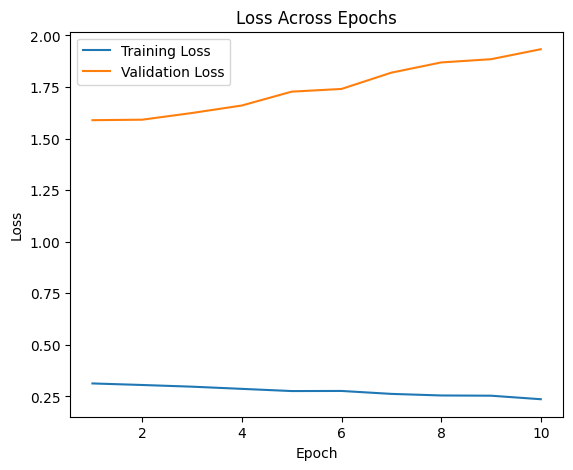

In [80]:
epochs_range = range(1, len(history.history['loss']) + 1)

pplt.figure(figsize=(14, 5))

pplt.subplot(1, 2, 1)
pplt.plot(epochs_range, history.history['loss'], label='Training Loss')
pplt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
pplt.title('Loss Across Epochs')
pplt.xlabel('Epoch')
pplt.ylabel('Loss')
pplt.legend()

# Training Accuracy v/s Epoch

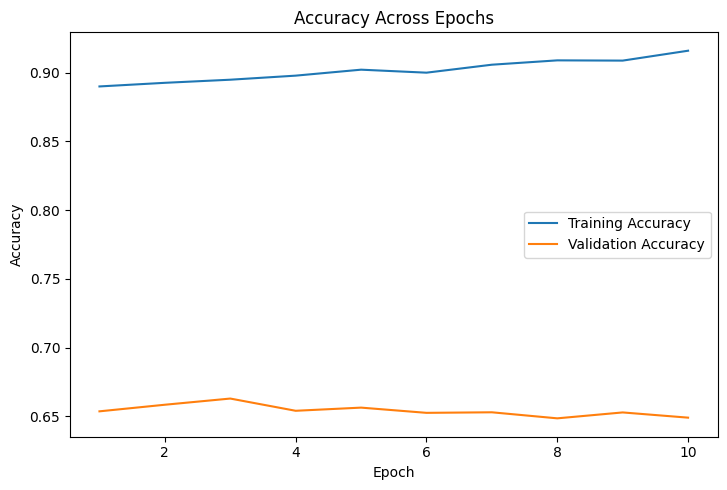

In [81]:
epochs_range = range(1, len(history.history['loss']) + 1)
pplt.figure(figsize=(14, 5))

pplt.subplot(1, 2, 2)
pplt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
pplt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
pplt.title('Accuracy Across Epochs')
pplt.xlabel('Epoch')
pplt.ylabel('Accuracy')
pplt.legend()

pplt.tight_layout()
pplt.show()

# Model Evaluation

In [82]:
results = my_cnn_model.evaluate(test_the_images, test_labels_encoded, verbose=0)
print("\nFinal Test Accuracy: {:.2f}%".format(results[1] * 100))



Final Test Accuracy: 64.90%


# Performance Analysis


I observed a difference in accuarcay for training and testing and when i ploted the graphs i observed that the validation loss is above 1.75 and the validation accuracy is very small which suggests that the MODEL IS OVERFIT and it can be imporived by adding dropout or data augmentation or early stopping.